In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly.express as px

In [106]:
ebus = pd.read_excel("2021 Diesel Issued to Ebuses.xlsx")
temps = pd.read_excel("edmonton_temps.xlsx")
temps

,date,Year,Month,Day,Max Temp (°C),Min Temp (°C)
0,2021-01-01,2021,1,1,-4.2,-13.1
1,2021-01-02,2021,1,2,4.0,-11.4
2,2021-01-03,2021,1,3,3.0,-7.8
3,2021-01-04,2021,1,4,-4.4,-13.2
4,2021-01-05,2021,1,5,-1.4,-7.7
...,...,...,...,...,...,...
360,2021-12-27,2021,12,27,-28.4,-41.7
361,2021-12-28,2021,12,28,-22.8,-42.1
362,2021-12-29,2021,12,29,-22.1,-32.9
363,2021-12-30,2021,12,30,-21.7,-37.6


In [107]:
trips = pd.read_excel("ETS Daily Bus Energy Consumption.xlsx")
trips['datetime'] = pd.to_datetime(trips.Date)
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5022 entries, 0 to 5021
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unit No                   5022 non-null   object        
 1   Date                      5022 non-null   object        
 2   Daily Route Status        5022 non-null   object        
 3   Start of Day Odometer     3615 non-null   float64       
 4   End of Day Odometer       4455 non-null   float64       
 5   Kilometers                5022 non-null   float64       
 6   Average Net kWH per KM    4966 non-null   float64       
 7   Average Gross kWH per KM  4966 non-null   float64       
 8   Start of Day SOC          3759 non-null   float64       
 9   End of Day SOC            4634 non-null   float64       
 10  Ave Ambient Temp (C)      4880 non-null   float64       
 11  Ave Temp (EnviroCanada)   5022 non-null   float64       
 12  Energy Charged (kWH)

In [108]:
ebus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unit No               2783 non-null   object 
 1   Transaction Day       2783 non-null   object 
 2   Time of Transaction   2783 non-null   object 
 3   Fuel                  2783 non-null   object 
 4   Loc Desc              2783 non-null   object 
 5   Category Description  2783 non-null   object 
 6   Issue Qty             2783 non-null   float64
 7   Total $/L             2783 non-null   float64
 8   Total Do              2783 non-null   float64
dtypes: float64(3), object(6)
memory usage: 195.8+ KB


In [109]:
ebus['datetimeindex'] = pd.to_datetime(ebus['Transaction Day'] + ' ' + ebus['Time of Transaction'] )
#ebus['time'] = ebus.timestamp.dt.time
ebus['time'] = pd.to_datetime(ebus['Time of Transaction']).dt.strftime('%H:%M')
ebus

,Unit No,Transaction Day,Time of Transaction,Fuel,Loc Desc,Category Description,Issue Qty,Total $/L,Total Do,datetimeindex,time
0,N8000,08-Jan-21,15:52:44,DIESEL,Fuel - Centennial Transit,ELECTRIC BUS,22.8,0.9638,21.97464,2021-01-08 15:52:44,15:52
1,N8000,12-Jan-21,15:59:09,DIESEL,Fuel - Centennial Transit,ELECTRIC BUS,5.8,0.9638,5.59004,2021-01-12 15:59:09,15:59
2,N8000,19-Jan-21,16:17:47,DIESEL,Fuel - Centennial Transit,ELECTRIC BUS,6.1,0.9419,5.74559,2021-01-19 16:17:47,16:17
3,N8000,03-Feb-21,18:55:34,DIESEL,Fuel - Centennial Transit,ELECTRIC BUS,10.6,0.9524,10.09544,2021-02-03 18:55:34,18:55
4,N8000,10-Feb-21,22:06:21,DIESEL,Fuel - Centennial Transit,ELECTRIC BUS,2.3,0.9638,2.21674,2021-02-10 22:06:21,22:06
...,...,...,...,...,...,...,...,...,...,...,...
2778,N8039,26-Oct-21,11:10:16,DIESEL,Fuel - Kathleen Andrews Transit,ELECTRIC BUS,14.3,0.9423,13.47489,2021-10-26 11:10:16,11:10
2779,N8039,27-Oct-21,10:55:50,DIESEL,Fuel - Kathleen Andrews Transit,ELECTRIC BUS,13.8,0.9423,13.00374,2021-10-27 10:55:50,10:55
2780,N8039,28-Oct-21,19:27:48,DIESEL,Fuel - Kathleen Andrews Transit,ELECTRIC BUS,24.8,0.9423,23.36904,2021-10-28 19:27:48,19:27
2781,N8039,02-Nov-21,00:58:57,DIESEL,Fuel - Kathleen Andrews Transit,ELECTRIC BUS,14.9,0.9172,13.66628,2021-11-02 00:58:57,00:58


In [110]:
df = pd.merge_asof(ebus.sort_values('datetimeindex'), temps, left_on="datetimeindex", right_on="date")
df

,Unit No,Transaction Day,Time of Transaction,Fuel,Loc Desc,Category Description,Issue Qty,Total $/L,Total Do,datetimeindex,time,date,Year,Month,Day,Max Temp (°C),Min Temp (°C)
0,N8013,01-Jan-21,00:05:01,DIESEL,Fuel - Kathleen Andrews Transit,ELECTRIC BUS,7.4,0.9839,7.28086,2021-01-01 00:05:01,00:05,2021-01-01,2021,1,1,-4.2,-13.1
1,N8018,04-Jan-21,17:12:22,DIESEL,Fuel - Kathleen Andrews Transit,ELECTRIC BUS,9.6,0.9876,9.48096,2021-01-04 17:12:22,17:12,2021-01-04,2021,1,4,-4.4,-13.2
2,N8037,04-Jan-21,17:46:49,DIESEL,Fuel - Kathleen Andrews Transit,ELECTRIC BUS,7.1,0.9876,7.01196,2021-01-04 17:46:49,17:46,2021-01-04,2021,1,4,-4.4,-13.2
3,N8023,04-Jan-21,18:11:02,DIESEL,Fuel - Kathleen Andrews Transit,ELECTRIC BUS,9.4,0.9876,9.28344,2021-01-04 18:11:02,18:11,2021-01-04,2021,1,4,-4.4,-13.2
4,N8013,04-Jan-21,18:53:42,DIESEL,Fuel - Kathleen Andrews Transit,ELECTRIC BUS,9.2,0.9876,9.08592,2021-01-04 18:53:42,18:53,2021-01-04,2021,1,4,-4.4,-13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,N8000,24-Dec-21,18:41:19,DIESEL,Fuel - Centennial Transit,ELECTRIC BUS,8.9,0.9287,8.26543,2021-12-24 18:41:19,18:41,2021-12-24,2021,12,24,-17.1,-24.8
2779,N8002,28-Dec-21,19:38:17,DIESEL,Fuel - Centennial Transit,ELECTRIC BUS,17.9,0.9287,16.62373,2021-12-28 19:38:17,19:38,2021-12-28,2021,12,28,-22.8,-42.1
2780,N8012,29-Dec-21,12:32:26,DIESEL,Fuel - Kathleen Andrews Transit,ELECTRIC BUS,8.0,0.9287,7.42960,2021-12-29 12:32:26,12:32,2021-12-29,2021,12,29,-22.1,-32.9
2781,N8006,30-Dec-21,19:45:34,DIESEL,Fuel - Centennial Transit,ELECTRIC BUS,36.4,0.9287,33.80468,2021-12-30 19:45:34,19:45,2021-12-30,2021,12,30,-21.7,-37.6


In [111]:
df = pd.merge(df.sort_values('Unit No'), trips.sort_values('Unit No'), left_on=["Unit No", "date",], right_on=[ "Unit No", "datetime",])
#df_2 = pd.merge(ebus, trips, on="datetimeindex")
df

,Unit No,Transaction Day,Time of Transaction,Fuel,Loc Desc,Category Description,Issue Qty,Total $/L,Total Do,datetimeindex,...,Ave Temp (EnviroCanada),Energy Charged (kWH),Regenerated kWH,Energy Consumed (kWH),kWH for components,Hours Charging,Hours Moving,Hours Stopped,Hours Operating,datetime
0,N8000,26-May-21,15:19:21,DIESEL,Fuel - Centennial Transit,ELECTRIC BUS,0.5,0.9723,0.48615,2021-05-26 15:19:21,...,12.45,53.67020,15.5316,46.0757,65.620510,2.933056,1.110000,0.787778,4.830833,2021-05-26
1,N8000,26-May-21,15:20:14,DIESEL,Fuel - Centennial Transit,ELECTRIC BUS,18.5,0.9723,17.98755,2021-05-26 15:20:14,...,12.45,53.67020,15.5316,46.0757,65.620510,2.933056,1.110000,0.787778,4.830833,2021-05-26
2,N8000,27-Oct-21,16:54:01,DIESEL,Fuel - Centennial Transit,ELECTRIC BUS,23.4,0.9423,22.04982,2021-10-27 16:54:01,...,6.10,0.16747,29.6063,104.9460,239.375611,14.911667,4.387778,3.747778,10.109444,2021-10-27
3,N8000,20-Apr-21,15:50:03,DIESEL,Fuel - Centennial Transit,ELECTRIC BUS,19.5,0.8816,17.19120,2021-04-20 15:50:03,...,4.65,349.04900,35.6273,128.4740,78.358315,6.046389,2.500556,1.406111,9.953056,2021-04-20
4,N8000,22-Apr-21,15:45:16,DIESEL,Fuel - Centennial Transit,ELECTRIC BUS,6.2,0.8816,5.46592,2021-04-22 15:45:16,...,-0.15,168.62400,43.1418,226.9880,128.989974,5.145000,3.954167,5.164722,14.263889,2021-04-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,N8039,26-Aug-21,00:49:18,DIESEL,Fuel - Kathleen Andrews Transit,ELECTRIC BUS,7.6,0.8686,6.60136,2021-08-26 00:49:18,...,17.35,397.57500,69.6402,205.3940,298.001056,9.008333,5.956944,4.314722,19.280000,2021-08-26
1753,N8039,10-May-21,18:01:48,DIESEL,Fuel - Kathleen Andrews Transit,ELECTRIC BUS,6.2,0.9552,5.92224,2021-05-10 18:01:48,...,9.05,292.90100,113.0050,273.6170,394.590743,3.470000,7.481389,5.121944,16.073333,2021-05-10
1754,N8039,03-Sep-21,17:33:06,DIESEL,Fuel - Kathleen Andrews Transit,ELECTRIC BUS,10.3,0.8939,9.20717,2021-09-03 17:33:06,...,13.50,296.36600,74.3204,195.4880,285.326975,8.753056,6.339444,5.156667,20.249444,2021-09-03
1755,N8039,20-May-21,22:19:33,DIESEL,Fuel - Kathleen Andrews Transit,ELECTRIC BUS,8.2,0.9726,7.97532,2021-05-20 22:19:33,...,2.80,68.37470,74.6252,224.4150,303.292030,5.212500,5.239722,4.706667,15.159167,2021-05-20


<AxesSubplot:xlabel='date', ylabel='Min Temp (°C)'>

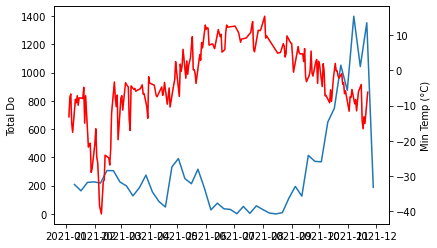

In [112]:
ebus_sum = df.resample('W', on='datetimeindex').sum()
sns.lineplot(x=ebus_sum.index.values, y=ebus_sum['Total Do'])
ax2 = plt.twinx()
#sns.lineplot(x=df["Date/Time"], y=df["Max Temp (°C)"], color='red')
sns.lineplot(x=df["date"], y=df["Min Temp (°C)"], color='red')

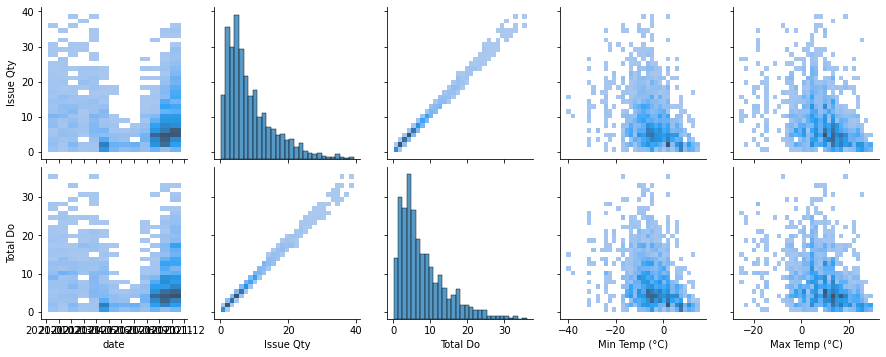

In [113]:
sns.pairplot(df, kind='hist',x_vars=['date', "Issue Qty", "Total Do", "Min Temp (°C)", "Max Temp (°C)"], y_vars=[ "Issue Qty", "Total Do"])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1757 entries, 0 to 1756
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unit No                   1757 non-null   object        
 1   Transaction Day           1757 non-null   object        
 2   Time of Transaction       1757 non-null   object        
 3   Fuel                      1757 non-null   object        
 4   Loc Desc                  1757 non-null   object        
 5   Category Description      1757 non-null   object        
 6   Issue Qty                 1757 non-null   float64       
 7   Total $/L                 1757 non-null   float64       
 8   Total Do                  1757 non-null   float64       
 9   datetimeindex             1757 non-null   datetime64[ns]
 10  time                      1757 non-null   object        
 11  date                      1757 non-null   datetime64[ns]
 12  Year                

<AxesSubplot:>

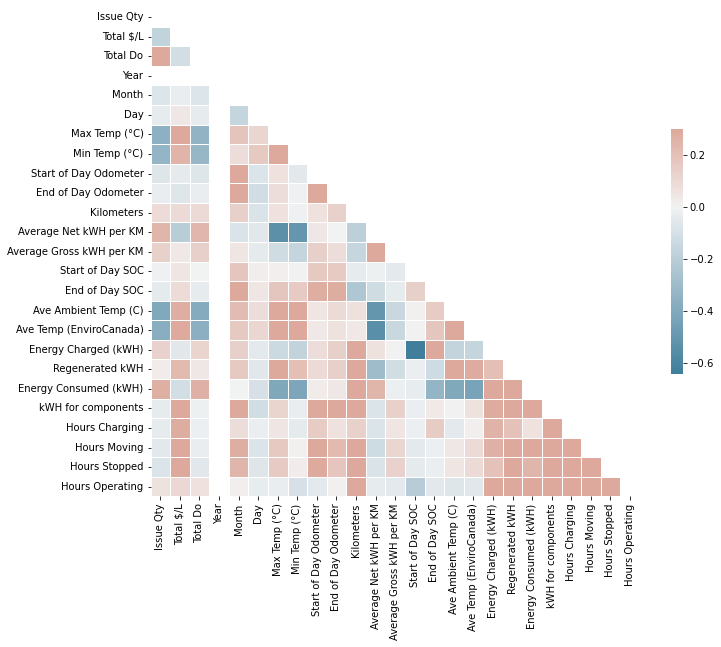

In [115]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [116]:
df['hourly_cons'] = df["Total Do"] / df["Hours Operating"]

In [117]:
df['hourly_cons'].replace([np.inf, -np.inf], np.nan, inplace=True)
df.hourly_cons.describe()

count    1753.000000
mean        1.072158
std        23.145568
min         0.003580
25%         0.204027
50%         0.368398
75%         0.666507
max       969.334500
Name: hourly_cons, dtype: float64

In [118]:
df['hourly_cons'] = np.where(df.hourly_cons > 500,  df["Total Do"] / df["Hours Charging"] , df["Total Do"] / df["Hours Operating"])

<AxesSubplot:>

<Figure size 864x432 with 0 Axes>

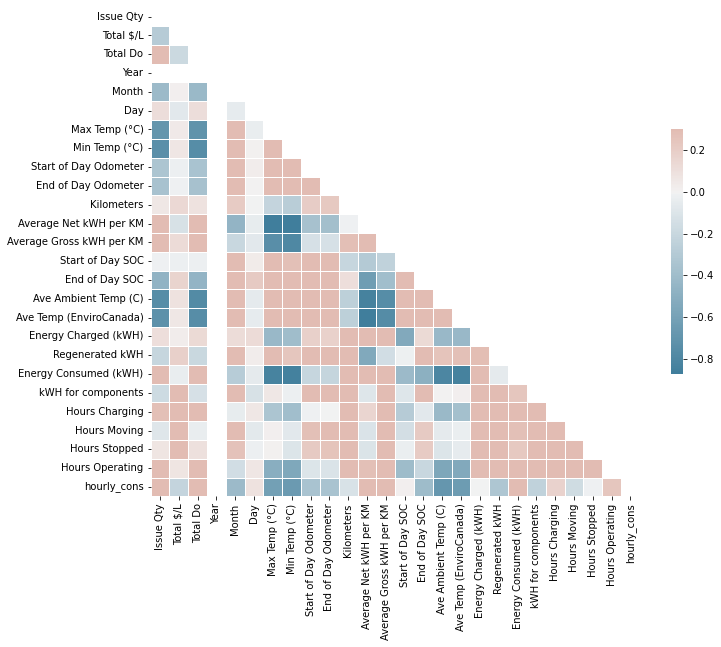

In [119]:
plt.figure(figsize=(12,6))
df_ave = df.resample('W', on='datetimeindex').mean()
df_ave['datetimefield'] = df_ave.index.values

corr = df_ave.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

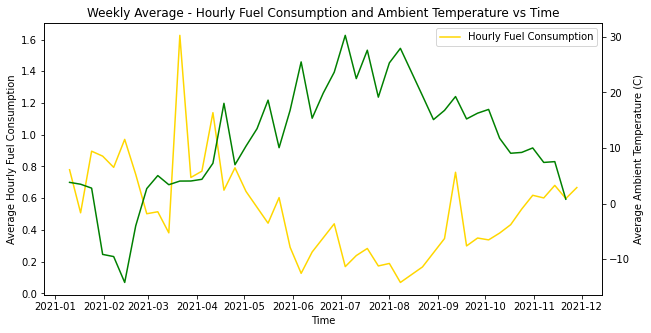

In [120]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x=df_ave.index.values, y=df_ave.hourly_cons, color='gold', legend="full", label='Hourly Fuel Consumption')
ax2 = plt.twinx()
sns.lineplot(x=df_ave.index.values, y=df_ave['Ave Ambient Temp (C)'], color='green')
p.set_ylabel("Average Hourly Fuel Consumption")
p.set_xlabel("Time")
p.set_title("Weekly Average - Hourly Fuel Consumption and Ambient Temperature vs Time")
ax2.set_ylabel("Average Ambient Temperature (C)")
plt.show()

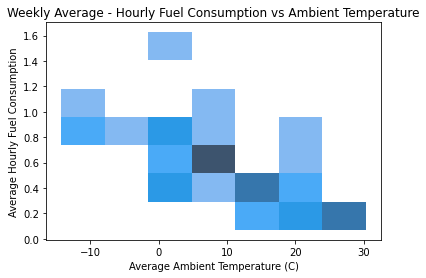

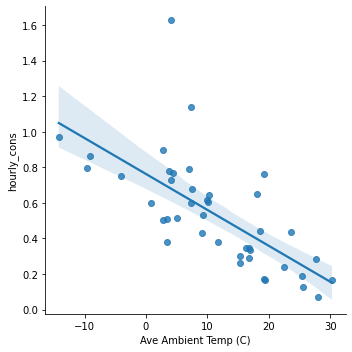

In [121]:
p = sns.histplot(x=df_ave['Ave Ambient Temp (C)'], y=df_ave.hourly_cons)
p.set_ylabel("Average Hourly Fuel Consumption")
p.set_xlabel("Average Ambient Temperature (C)")
p.set_title("Weekly Average - Hourly Fuel Consumption vs Ambient Temperature")
sns.lmplot(x='Ave Ambient Temp (C)', y="hourly_cons", data=df_ave)

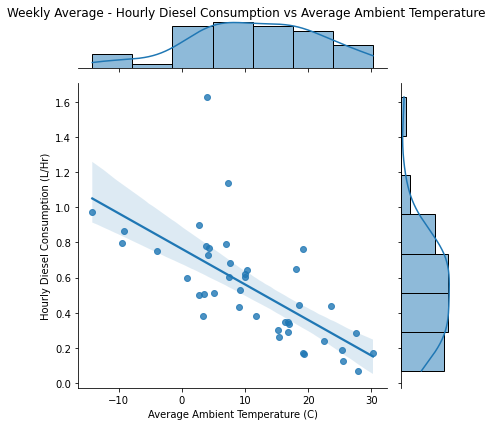

In [122]:
p = sns.jointplot(x='Ave Ambient Temp (C)', y="hourly_cons", data=df_ave, kind="reg")
p.set_axis_labels('Average Ambient Temperature (C)', 'Hourly Diesel Consumption (L/Hr)')
p.fig.suptitle("Weekly Average - Hourly Diesel Consumption vs Average Ambient Temperature")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

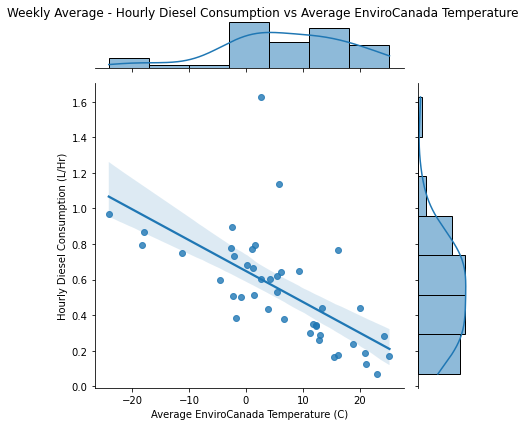

In [123]:
p = sns.jointplot(x='Ave Temp (EnviroCanada)', y="hourly_cons", data=df_ave, kind="reg")
p.set_axis_labels('Average EnviroCanada Temperature (C)', 'Hourly Diesel Consumption (L/Hr)')
p.fig.suptitle("Weekly Average - Hourly Diesel Consumption vs Average EnviroCanada Temperature")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

In [124]:
fig = px.scatter(
    df_ave, x='Ave Ambient Temp (C)', y='hourly_cons', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue', width=800, height=400, title="Hourly Diesel Consumption vs Average Ambient Temperature",
    labels={'Ave Ambient Temp (C)':'Average Ambient Temperature (C)', 
            'hourly_cons':"Hourly Diesel Consumption (L / Hr)", }
)
fig.show()

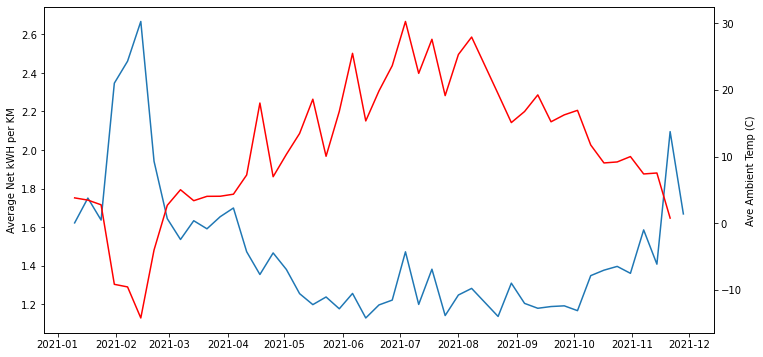

In [125]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df_ave.index.values, y=df_ave['Average Net kWH per KM'])
ax2 = plt.twinx()
sns.lineplot(x=df_ave.index.values, y=df_ave['Ave Ambient Temp (C)'], color='red')
plt.show()

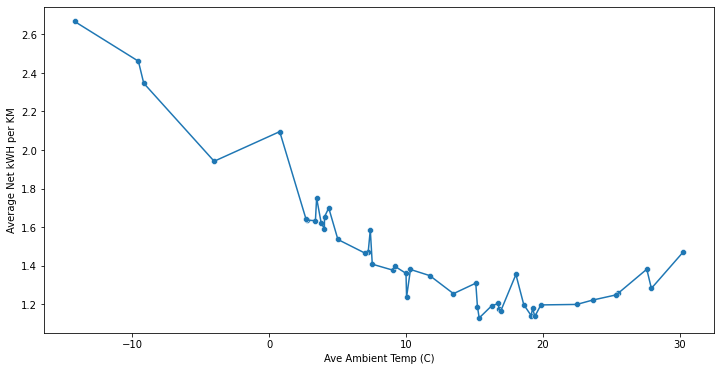

In [126]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df_ave['Ave Ambient Temp (C)'], y=df_ave['Average Net kWH per KM'])
sns.scatterplot(x=df_ave['Ave Ambient Temp (C)'], y=df_ave['Average Net kWH per KM'])
plt.show()

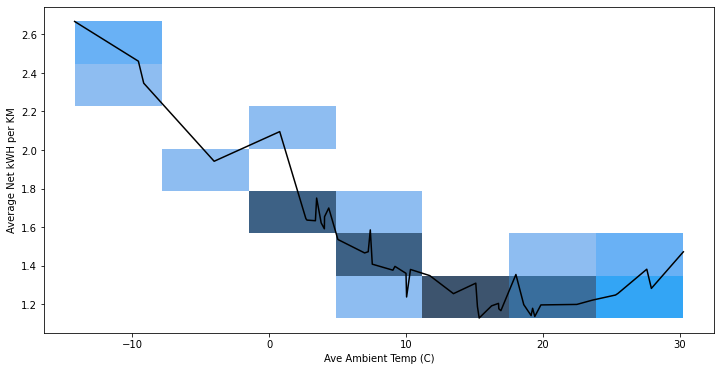

In [127]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df_ave['Ave Ambient Temp (C)'], y=df_ave['Average Net kWH per KM'], color="black")
sns.histplot(x=df_ave['Ave Ambient Temp (C)'], y=df_ave['Average Net kWH per KM'])
plt.show()

In [128]:
fig = px.scatter(
    df_ave, x='Ave Temp (EnviroCanada)', y='hourly_cons', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue', width=800, height=400, title="Weekly Average - Hourly Diesel Consumption vs EnviroCanada Temperature",
    labels={'Ave Temp (EnviroCanada)':'EnviroCanada Temperature (C)', 
            'hourly_cons':"Hourly Diesel Consumption (L / Hr)", }
)
fig.show()

In [129]:
df_ave = df_ave.rename(columns={"hourly_cons":"Average Hourly Fuel Consumption"})
df_ave=df_ave.drop(columns=['Year', 'Month', 'Day','Start of Day Odometer','End of Day Odometer','datetimefield'])

In [130]:
df = df.rename(columns={"hourly_cons":"Hourly Fuel Consumption"})
df = df.drop(columns=['date', 'Year', 'Month', 'Day','Start of Day Odometer','End of Day Odometer','datetime'])

In [131]:
df.to_excel('./Results/Excel/full_dataset.xlsx')
df_ave.to_excel('./Results/Excel/weekly_ave_dataset.xlsx')

In [132]:
df["Issue Qty"].fillna(0)
df["Kilometers"].fillna(0)

condition_1 = df["Kilometers"] == 0
condition_2 = (df["Issue Qty"] / df["Kilometers"] ) > 10
conditions = [condition_1, condition_2]
value_1 = 0
value_2 = 0.2
values = [value_1, value_2]

df["Diesel L/km"] = np.select(conditions, values, default=df["Issue Qty"] / df["Kilometers"]) #np.where(df["Kilometers"] == 0 , 0, df["Issue Qty"] / df["Kilometers"])
df.describe()

,Issue Qty,Total $/L,Total Do,Max Temp (°C),Min Temp (°C),Kilometers,Average Net kWH per KM,Average Gross kWH per KM,Start of Day SOC,End of Day SOC,...,Energy Charged (kWH),Regenerated kWH,Energy Consumed (kWH),kWH for components,Hours Charging,Hours Moving,Hours Stopped,Hours Operating,Hourly Fuel Consumption,Diesel L/km
count,1757.000000,1757.000000,1757.000000,1751.000000,1751.000000,1757.000000,1750.000000,1750.000000,1275.000000,1695.000000,...,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000
mean,8.700341,0.913895,7.890233,9.449286,-4.294061,170.349255,1.475755,2.034135,82.791214,81.311733,...,239.567911,68.057226,245.519886,366.549897,7.770527,7.233186,5.940224,16.810826,inf,0.058772
std,6.977973,0.049976,6.248943,9.556888,8.196336,58.663311,0.553662,1.579787,21.204027,21.801186,...,154.453603,32.419751,96.389209,244.212466,5.624605,4.417747,3.962729,4.981684,NaN,0.063179
min,0.100000,0.798600,0.079860,-26.000000,-40.800000,0.000000,0.384538,0.384538,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003580,0.000000
25%,3.700000,0.860900,3.453430,4.800000,-8.800000,127.875001,1.214370,1.659725,68.883600,67.995350,...,129.646000,42.638400,175.973000,191.954107,3.618333,4.345000,3.217778,13.530000,0.204293,0.021931
50%,6.600000,0.917200,5.940210,10.500000,-4.600000,182.540004,1.349415,1.908459,94.345300,90.918800,...,234.378000,68.510600,249.337000,319.355198,6.833611,6.695278,5.059444,17.248333,0.368475,0.041230
75%,12.000000,0.963800,10.787380,15.700000,1.800000,213.240003,1.598467,2.229907,100.000000,99.607800,...,342.126000,90.908800,305.747000,488.809477,11.225000,9.036389,8.242500,20.536944,0.673840,0.074505
max,39.300000,0.987600,35.983080,30.100000,15.400000,438.380008,15.464844,58.690908,100.000000,100.000000,...,1056.980000,175.418000,659.284000,1066.649172,34.360278,19.441667,22.918333,24.000556,inf,0.562621


In [133]:
MJ_TO_KWH = 1 / 3.6 # KWh / MJ
DIESEL_HHV = 38.65 * MJ_TO_KWH # MJ/L * (KWh/MJ) = KWh/L
DIESEL_LHV = 36.12 * MJ_TO_KWH # MJ/L * (KWh/MJ) = KWh/L

temp_minus10 =  df["Diesel L/km"].groupby(df["Ave Ambient Temp (C)"] < -10 ).mean()
temp_minus10_5 =  df["Diesel L/km"].groupby((df["Ave Ambient Temp (C)"].between(-10,5)) ).mean()
temp_minus5_0 =  df["Diesel L/km"].groupby((df["Ave Ambient Temp (C)"].between(-5,0)) ).mean()
temp_plus0_5 =  df["Diesel L/km"].groupby((df["Ave Ambient Temp (C)"].between(0,5)) ).mean()
temp_plus5_10 =  df["Diesel L/km"].groupby((df["Ave Ambient Temp (C)"].between(5,10)) ).mean()
temp_plus10_15 = df["Diesel L/km"].groupby((df["Ave Ambient Temp (C)"].between(10,15)), dropna=True ).mean()
temp_plus15_20 = df["Diesel L/km"].groupby((df["Ave Ambient Temp (C)"].between(15,20)) ).mean()
temp_plus20_25 = df["Diesel L/km"].groupby((df["Ave Ambient Temp (C)"].between(20,25)) ).mean()
temp_plus25_30 = df["Diesel L/km"].groupby((df["Ave Ambient Temp (C)"].between(25,30)) ).mean()
temp_plus30 =  df["Diesel L/km"].groupby(df["Ave Ambient Temp (C)"] > 30 ).mean()

results_text = ["Below -10C", "-10C to -5C", "-5C to 0C", "0C to 5C", "5C to 10C", "10C to 15C", "15C to 20C", "20C to 25C", "25C to 30C", "Above 30C"]
results_text_f = ["Below 14F", "14F to 23F", "23F to 32F", "32F to 41F", "41F to 50F", "50F to 59F", "59F to 68F", "68F to 77F", "77F to 86F", "Above 86F"]
results_5 = [temp_minus10[True], temp_minus10_5[True], temp_minus10_5[True], temp_plus0_5[True], temp_plus5_10[True], temp_plus10_15[True], temp_plus15_20[True], temp_plus20_25[True], temp_plus25_30[True], temp_plus30[True]]

results = pd.DataFrame()   
results["Range in C"] = pd.DataFrame(results_text)
results["Range in F"] = pd.DataFrame(results_text_f)
results["Diesel L/km"] = pd.DataFrame(results_5)
results["Diesel Energy Equivalency HHV KWh/km"] = results["Diesel L/km"] * DIESEL_HHV
results["Diesel Energy Equivalency LHV KWh/km"] = results["Diesel L/km"] * DIESEL_LHV
results["Diesel Energy Equivalency HHV KWh/mile"] = results["Diesel Energy Equivalency HHV KWh/km"] * 1.609
results["Diesel Energy Equivalency LHV KWh/mile"] = results["Diesel Energy Equivalency LHV KWh/km"] * 1.609
results


,Range in C,Range in F,Diesel L/km,Diesel Energy Equivalency HHV KWh/km,Diesel Energy Equivalency LHV KWh/km,Diesel Energy Equivalency HHV KWh/mile,Diesel Energy Equivalency LHV KWh/mile
0,Below -10C,Below 14F,0.104635,1.123378,1.049842,1.807515,1.689196
1,-10C to -5C,14F to 23F,0.085836,0.921541,0.861218,1.482760,1.385700
2,-5C to 0C,23F to 32F,0.085836,0.921541,0.861218,1.482760,1.385700
3,0C to 5C,32F to 41F,0.080822,0.867711,0.810912,1.396147,1.304757
4,5C to 10C,41F to 50F,0.066498,0.713931,0.667197,1.148714,1.073520
5,10C to 15C,50F to 59F,0.048152,0.516964,0.483124,0.831796,0.777347
6,15C to 20C,59F to 68F,0.036264,0.389331,0.363846,0.626434,0.585428
7,20C to 25C,68F to 77F,0.027703,0.297418,0.277949,0.478546,0.447220
8,25C to 30C,77F to 86F,0.013081,0.140443,0.131249,0.225972,0.211180
9,Above 30C,Above 86F,0.007382,0.079252,0.074064,0.127517,0.119170


In [134]:
minus10 =  df["Diesel L/km"].groupby(df["Ave Ambient Temp (C)"] < -10 ).count()[True]
minus10_5 =  df["Diesel L/km"].groupby((df["Ave Ambient Temp (C)"].between(-10,5)) ).count()[True]
minus5_0 =  df["Diesel L/km"].groupby((df["Ave Ambient Temp (C)"].between(-5,0)) ).count()[True]
plus0_5 =  df["Diesel L/km"].groupby((df["Ave Ambient Temp (C)"].between(0,5)) ).count()[True]
plus5_10 =  df["Diesel L/km"].groupby((df["Ave Ambient Temp (C)"].between(5,10)) ).count()[True]
plus10_15 = df["Diesel L/km"].groupby((df["Ave Ambient Temp (C)"].between(10,15)), dropna=True ).count()[True]
plus15_20 = df["Diesel L/km"].groupby((df["Ave Ambient Temp (C)"].between(15,20)) ).count()[True]
plus20_25 = df["Diesel L/km"].groupby((df["Ave Ambient Temp (C)"].between(20,25)) ).count()[True]
plus25_30 = df["Diesel L/km"].groupby((df["Ave Ambient Temp (C)"].between(25,30)) ).count()[True]
plus30 =  df["Diesel L/km"].groupby(df["Ave Ambient Temp (C)"] > 30 ).count()[True]

count_list = [minus10 , minus10_5, minus5_0 , plus0_5, plus5_10, plus10_15, plus15_20, plus20_25, plus25_30 , plus30]

results["Instances"] = count_list
results

,Range in C,Range in F,Diesel L/km,Diesel Energy Equivalency HHV KWh/km,Diesel Energy Equivalency LHV KWh/km,Diesel Energy Equivalency HHV KWh/mile,Diesel Energy Equivalency LHV KWh/mile,Instances
0,Below -10C,Below 14F,0.104635,1.123378,1.049842,1.807515,1.689196,39
1,-10C to -5C,14F to 23F,0.085836,0.921541,0.861218,1.482760,1.385700,349
2,-5C to 0C,23F to 32F,0.085836,0.921541,0.861218,1.482760,1.385700,98
3,0C to 5C,32F to 41F,0.080822,0.867711,0.810912,1.396147,1.304757,223
4,5C to 10C,41F to 50F,0.066498,0.713931,0.667197,1.148714,1.073520,460
5,10C to 15C,50F to 59F,0.048152,0.516964,0.483124,0.831796,0.777347,393
6,15C to 20C,59F to 68F,0.036264,0.389331,0.363846,0.626434,0.585428,266
7,20C to 25C,68F to 77F,0.027703,0.297418,0.277949,0.478546,0.447220,100
8,25C to 30C,77F to 86F,0.013081,0.140443,0.131249,0.225972,0.211180,31
9,Above 30C,Above 86F,0.007382,0.079252,0.074064,0.127517,0.119170,5


In [135]:
#### mean of 0.058 and std dev of 0.063 from main dataset
std2 = 0.058 + 0.063 * 2
diesel_refined = df[df["Diesel L/km"] < std2]

temp_minus10 =  diesel_refined["Diesel L/km"].groupby(diesel_refined["Ave Ambient Temp (C)"] < -10 ).mean()
temp_minus10_5 =  diesel_refined["Diesel L/km"].groupby((diesel_refined["Ave Ambient Temp (C)"].between(-10,5)) ).mean()
temp_minus5_0 =  diesel_refined["Diesel L/km"].groupby((diesel_refined["Ave Ambient Temp (C)"].between(-5,0)) ).mean()
temp_plus0_5 =  diesel_refined["Diesel L/km"].groupby((diesel_refined["Ave Ambient Temp (C)"].between(0,5)) ).mean()
temp_plus5_10 =  diesel_refined["Diesel L/km"].groupby((diesel_refined["Ave Ambient Temp (C)"].between(5,10)) ).mean()
temp_plus10_15 = diesel_refined["Diesel L/km"].groupby((diesel_refined["Ave Ambient Temp (C)"].between(10,15)), dropna=True ).mean()
temp_plus15_20 = diesel_refined["Diesel L/km"].groupby((diesel_refined["Ave Ambient Temp (C)"].between(15,20)) ).mean()
temp_plus20_25 = diesel_refined["Diesel L/km"].groupby((diesel_refined["Ave Ambient Temp (C)"].between(20,25)) ).mean()
temp_plus25_30 = diesel_refined["Diesel L/km"].groupby((diesel_refined["Ave Ambient Temp (C)"].between(25,30)) ).mean()
temp_plus30 =  diesel_refined["Diesel L/km"].groupby(diesel_refined["Ave Ambient Temp (C)"] > 30 ).mean()

minus10 =  diesel_refined["Diesel L/km"].groupby(diesel_refined["Ave Ambient Temp (C)"] < -10 ).count()[True]
minus10_5 =  diesel_refined["Diesel L/km"].groupby((diesel_refined["Ave Ambient Temp (C)"].between(-10,5)) ).count()[True]
minus5_0 =  diesel_refined["Diesel L/km"].groupby((diesel_refined["Ave Ambient Temp (C)"].between(-5,0)) ).count()[True]
plus0_5 =  diesel_refined["Diesel L/km"].groupby((diesel_refined["Ave Ambient Temp (C)"].between(0,5)) ).count()[True]
plus5_10 =  diesel_refined["Diesel L/km"].groupby((diesel_refined["Ave Ambient Temp (C)"].between(5,10)) ).count()[True]
plus10_15 = diesel_refined["Diesel L/km"].groupby((diesel_refined["Ave Ambient Temp (C)"].between(10,15)), dropna=True ).count()[True]
plus15_20 = diesel_refined["Diesel L/km"].groupby((diesel_refined["Ave Ambient Temp (C)"].between(15,20)) ).count()[True]
plus20_25 = diesel_refined["Diesel L/km"].groupby((diesel_refined["Ave Ambient Temp (C)"].between(20,25)) ).count()[True]
plus25_30 = diesel_refined["Diesel L/km"].groupby((diesel_refined["Ave Ambient Temp (C)"].between(25,30)) ).count()[True]
plus30 =  diesel_refined["Diesel L/km"].groupby(diesel_refined["Ave Ambient Temp (C)"] > 30 ).count()[True]

results_text = ["Below -10C", "-10C to -5C", "-5C to 0C", "0C to 5C", "5C to 10C", "10C to 15C", "15C to 20C", "20C to 25C", "25C to 30C", "Above 30C"]
results_text_f = ["Below 14F", "14F to 23F", "23F to 32F", "32F to 41F", "41F to 50F", "50F to 59F", "59F to 68F", "68F to 77F", "77F to 86F", "Above 86F"]
results_5 = [temp_minus10[True], temp_minus10_5[True], temp_minus10_5[True], temp_plus0_5[True], temp_plus5_10[True], temp_plus10_15[True], temp_plus15_20[True], temp_plus20_25[True], temp_plus25_30[True], temp_plus30[True]]

count_list = [minus10 , minus10_5, minus5_0 , plus0_5, plus5_10, plus10_15, plus15_20, plus20_25, plus25_30 , plus30]

results_refined = pd.DataFrame()   
results_refined["Range in C"] = pd.DataFrame(results_text)
results_refined["Range in F"] = pd.DataFrame(results_text_f)
results_refined["Diesel L/km"] = pd.DataFrame(results_5)
results_refined["Diesel Energy Equivalency HHV KWh/km"] = results_refined["Diesel L/km"] * DIESEL_HHV
results_refined["Diesel Energy Equivalency LHV KWh/km"] = results_refined["Diesel L/km"] * DIESEL_LHV
results_refined["Diesel Energy Equivalency HHV KWh/mile"] = results_refined["Diesel Energy Equivalency HHV KWh/km"] * 1.609
results_refined["Diesel Energy Equivalency LHV KWh/mile"] = results_refined["Diesel Energy Equivalency LHV KWh/km"] * 1.609
results_refined

,Range in C,Range in F,Diesel L/km,Diesel Energy Equivalency HHV KWh/km,Diesel Energy Equivalency LHV KWh/km,Diesel Energy Equivalency HHV KWh/mile,Diesel Energy Equivalency LHV KWh/mile
0,Below -10C,Below 14F,0.087563,0.940088,0.878551,1.512602,1.413588
1,-10C to -5C,14F to 23F,0.068849,0.739176,0.690790,1.189333,1.111481
2,-5C to 0C,23F to 32F,0.068849,0.739176,0.690790,1.189333,1.111481
3,0C to 5C,32F to 41F,0.063889,0.685917,0.641017,1.103640,1.031396
4,5C to 10C,41F to 50F,0.057227,0.614391,0.574173,0.988554,0.923844
5,10C to 15C,50F to 59F,0.040955,0.439695,0.410913,0.707469,0.661159
6,15C to 20C,59F to 68F,0.031164,0.334578,0.312677,0.538336,0.503097
7,20C to 25C,68F to 77F,0.027703,0.297418,0.277949,0.478546,0.447220
8,25C to 30C,77F to 86F,0.013081,0.140443,0.131249,0.225972,0.211180
9,Above 30C,Above 86F,0.007382,0.079252,0.074064,0.127517,0.119170


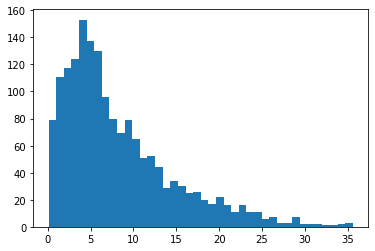

In [136]:
plt.hist(diesel_refined["Issue Qty"], bins=40)
plt.show()

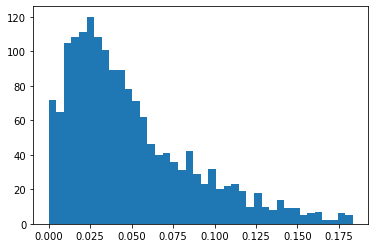

In [137]:
plt.hist(diesel_refined["Diesel L/km"], bins=40)
plt.show()

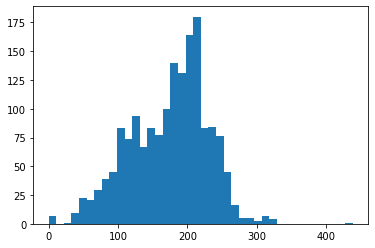

In [138]:
plt.hist(diesel_refined["Kilometers"], bins=40)
plt.show()

In [139]:
results_refined.to_csv('diesel_energy_consuption_equivalency_by_temp.csv', index=False)

<AxesSubplot:xlabel='Ave Ambient Temp (C)', ylabel='Diesel L/km'>

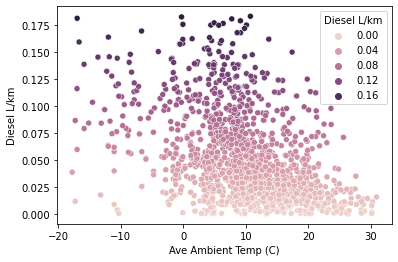

In [140]:
sns.scatterplot(data=diesel_refined, x="Ave Ambient Temp (C)", y="Diesel L/km", hue="Diesel L/km")

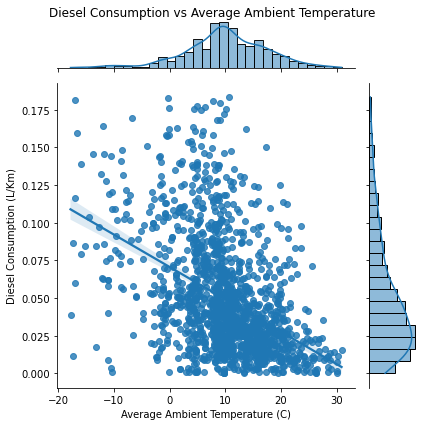

In [141]:
p = sns.jointplot(data=diesel_refined, x="Ave Ambient Temp (C)", y="Diesel L/km", kind="reg")
p.set_axis_labels('Average Ambient Temperature (C)', 'Diesel Consumption (L/Km)')
p.fig.suptitle("Diesel Consumption vs Average Ambient Temperature")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

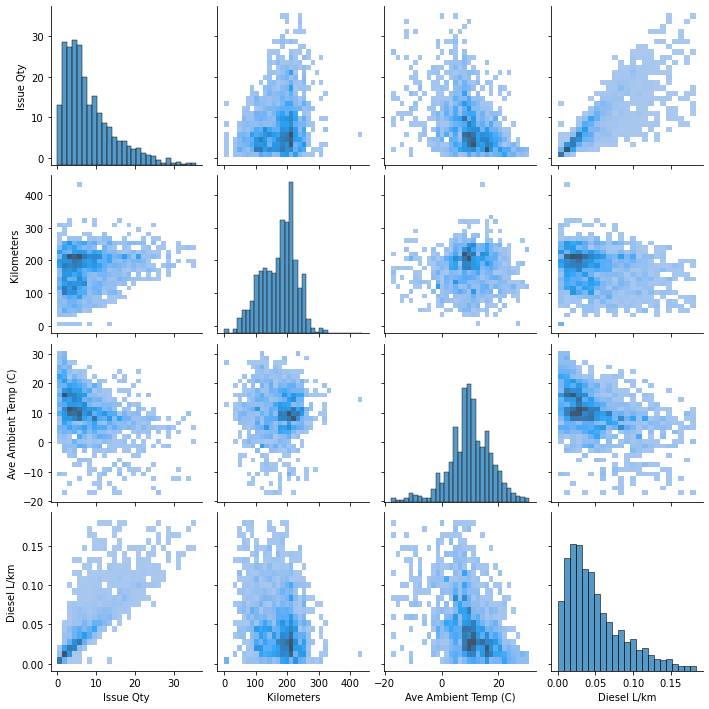

In [142]:
sns.pairplot(diesel_refined, kind='hist',x_vars=["Issue Qty", "Kilometers", "Ave Ambient Temp (C)", "Diesel L/km"], y_vars=["Issue Qty", "Kilometers", "Ave Ambient Temp (C)", "Diesel L/km"])